<a href="https://colab.research.google.com/github/thomasrcain/swfoundations/blob/master/NY_Times_Archive_API_2021_Final_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=red> Software Developer Foundations - Final Hackathon </font>


# What Happened on the Day that you were Born?

Python contructs we'll use in this Colab:
- Public API data ingest.
- Retrieve JSON data from the API for a _month_ and _year_.
- Filter the data for a specific _day of the month_.
- Use pandas to manipulate the data.
- Create a CSV of data.


## Description of the Coding Exercise
- We will query the **New York Times Archive API** for all the articles the Times has accessible from the API from your _BIRTH MONTH_ and _BIRTH YEAR_.
 - You can signup for an API Key at the [NY Times API Main Site](https://developer.nytimes.com/). 
  - Or you can use `kEBQsEG9EGEfQNutEqFNXBSq6m7etGAk`.
 - Start by reviewing the webpage here: [NY Times Archive API](https://developer.nytimes.com/docs/archive-product/1/overview).
 - Study the `Example Call` of the `Archive` API endpoint.
 - Be sure you **TEST** your code following every step.
 - Ask questions.
- **INPUT**: Ask the user for their birth month and year to query the NY Times Archive API.

## Helpful Steps
- After you understand how to invoke the endpoint, use the _Firefox_ browser to help you understand the structure of the API data by making a sample API call in the browser location bar.
- Instead of asking the user to input data, you might first `hardcode a birth month and birth year`.  Of course, it is suggested to use your own.  After your code is working, then you can incorporate user input.



# Obtaining the Data that you want by Querying the API

- You will obtain JSON data from the Archive API
 - Construct a URL to pass to the API.  If you're not sure of the format, then go back to the [NY Times Archive API](https://developer.nytimes.com/docs/archive-product/1/overview) and study the examples, as suggested earlier.
 - This code can help you:

 ```
 # Construct the URL
month_url = month + ".json"
url_parts = (base_url,year,month_url)
url = "/".join(url_parts)
print(url)
```
- You should be able to display a statement like the following after you retrieve the data:
 - `There are 17432 articles in month 12 of 1991.`



In [ ]:
import requests
import csv

# What is the "base URL" for the API?
base_url = "https://api.nytimes.com/svc/archive/v1/"

# API key here
myapikey = "kEBQsEG9EGEfQNutEqFNXBSq6m7etGAk"


# month = input("Enter your birthmonth 1-12: ")
# month = 12
# year = input("Enter your birthyear YYYY: ")
# year = 1991

# Construct the URL
month_url = month + ".json"
url_parts = (base_url,year,month_url)
url = "/".join(url_parts)
print(url)

# Setup the querystring

# Call request and convert the JSON data to a Python dict

# Get the response data

# Print out the "hits" key to show the number of articles that were returned
# by the NY Times Archive API


# Filter the data for your **date of birth**.

Be sure you understand that the API endpoint returned **all of the articles published in both a MONTH and YEAR.** We only want to consider the articles that were returned by the API for a single **day** in the _month/year_ of our birth.

Again, study the `JSON` data that is returned from the API call.  It is suggested that you use Firefox to review the response JSON data.

- What `JSON named key` defines the array of articles?  Retrieve the `articles` from `response_dict`.  
- Create a string variable called `dob`. Assign your birth date in this format: `"yyyy-mm-dd"`.
- Create an empty `Python list` variable called `dobArticles`. You will populate this list with all the **specific articles** returned by the API that are on YOUR **BIRTHDATE** from all the `articles`.
- Walk through the `articles` list and query the `pub_date` key in the JSON
 - How do you get to that field?
 - Notice that the data is in the form: `"1991-12-05T05:00:00+0000"`
 - We only need the string data PRIOR to the `T`, so we can use a `str.split('T')` call on SOME string `str`.  What string do we need to "split"?
 - When you `split` on `'T'`, the result can be stored in a tuple with 2 elements called `dayofmonth` and `garbage` because you don't need the data **after the `'T'`**.
 - Compare your `dob` to the appropriate part of the `split string`.
  - If there's a match, then `append` that dictionary to the `dobArticles` list.
- This cell should display something like this:
 - `There were 598 articles in the NY Times Archive published on your date of birth.`

In [ ]:
# Grab all the articles from the response_dict.
# What key do you need to index?

# Put your birthdate in this format
# yyyy-mm-dd
# Assign that STRING to variable called dob
# Create your date of birth list

# Walk through the articles list
# Access the "pub_date" key and split that string on 'T'
# Note that a tuple is returned by split.  
# You only need the first part
# If the first part of pub_date matches dob, then append to dobArticles


# Print out the number of articles published on your birthday


## Display a single article from your birth date.

You should have all the articles from your date of birth stored in the `dobArticles` list.  

- What is the data type of a single element in this list?
- Use a `for` loop to display all the data.

## Let's move to `pandas` so that we can more easily manipulate the data.

We will read `dobArticles` into a DataFrame and use that data structure to complete the exercise.

- `import pandas as pd`
- Create a DataFrame called `articles_df` and read the `dobArticles` list into it.
 - `dobarticles_df = pd.DataFrame(dobArticles)`
- Use `head()` to display the first 5 lines of this DataFrame
- Display any 3 consecutive articles from the `dobarticles_df` DataFrame using `iloc`. 

In [ ]:
import pandas as pd


## Let's find the articles that were on the Front Page of the NY Times (on your Birthdate).

### How many articles are there on the front page?
- What **column** do you need to look at?  What value?
- Create another DataFrame called `frontpage_df` that chooses ONLY rows from the front page.
 - **HINT**:  How did we choose the _rank one_ rows from the `fortune500` DataFrame?
- Use `shape` to determine the number of articles that appeared on the front page of the NY Times on your birthday.

In [ ]:
# Create the frontpage_df DataFrame from dobarticles_df

# Display the number of articles on the front page


## Display the resulting `frontpage_df` DataFrame

- Use `iloc` to display 5 articles from the `frontpage_df` DataFrame.  Eg. The 5th through 9th.
- Display the entire `frontpage_df` DataFrame

## Make a list of the Print **Headlines** from the articles on the Front Page.

- Look at the original JSON returned to the Firefox Browser earlier.
 - Look at the `headline` key.
- Using `frontpage_df`, assign only the `"headline"` column to a variable called `headlines`.
 - Look at the first element of `headlines` using `iloc[0]`.
 - The `headlines` variable is a datatype called a **`Series`**.  It's very much like a list but it's NOT a list.
 - Convert the `headlines Series` to a `list`. There's a function called `to_list()`.  Use that to convert `headlines` to a list:  
```headlinesList = headlines.to_list()```
 - Use Colab to verify that you do, indeed, have a list by hovering over the `headlinesList` variable.
 - What `type` of list do you have?
 - Display the first line of this list.
- Let's make our list of the Print Headlines.
 - Create a `Python list` variable called `printHeadlines`.
 - How do you populate this list with the `print_headline` strings from the front page headlines?
 - Display the resulting `printHeadlines` list using a `for` loop.


In [ ]:
# Make a list of the print headlines from the articles on the front page.

# Access the appropriate column from the frontpage_df DataFrame

# Check headlines.iloc[0]

# Use to_list() to force the `headlines` variable to be a list

# Append the print_headline string to the printHeadlines list.

# Print out printHeadlines
for i in printHeadlines:
  print(i)
  print()

### Create a CSV of the Front Page articles.

- This time you will use the `pandas` `to_csv()` function to create a CSV file from the `frontpage_df` DataFrame.
 - Create a `string` variable called `frontpage_birthdate` that uses the `dob` variable from above to create a meaningful CSV file name using string concatenation like: `"nytimes"+dob+"frontpage.csv"`
 - Create the CSV file using: 
 ```frontpage_df.to_csv(myfilename)```


In [ ]:
# Create a frontpage_birthdate filename

# Create a CSV from frontpage_df
# One line of code!


## View the CSV file either locally in Colab or download to Microsoft Excel.

- Use the list of `Print Headlines` that you generated above to identify an article that interests you.
- Use the URL in the `web_url` column and copy/paste that into a Web browser.

NOTE: For a NY Times Subscriber, you can typically view the entire Archived article through: "VIEW ON TIMESMACHINE". Most people will find this pretty fun to look at!


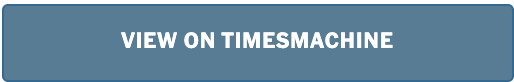

## OPTIONAL

If you can "View on Timesmachine", look for some type of **Index** on the front page that you are viewing.  If you find it, then identify the pages of a _Section_ that interests you.

Display the rows from TWO pages from that section.

- Create another DataFrame called `section_df` with only rows from the `print_page` that you identified above.
 - Use something like this to select the appropriate rows from `dobarticles_df`.
   - `dobarticles_df["print_page"].isin(["22","23"])`
- How many articles are in `section_df`?

## OPTIONAL (BUT FUN).

Let's search all articles containing an interesting keyword of your choice that appears in the _main headline_.  

The **desired goal**:
- Display the _main headline_ of all articles in the dataset `dobarticles_df` where `myKeyword` appears.
- List the URLs of all these articles.

Steps:
- Hardcode a variable `myKeyword` with a string of your choice - the word that you want to search all articles for.
- Create a list `urlList = []`
- Create a counter `i = 0`.
- Use a `for` loop to walk through the `headline` column of the dataframe
 - `dobarticles_df.headline`
 - Store the `main` key in a variable called `mainheadline`.  Since that's a string, you should use the `lower()` function to normalize the string data.
 - `if keyword in mainheadline`, then do the following:
   - Print out `mainheadline`.
   - Append the associated URL in the `web_url` key to `urlList`:
    - `dobarticles_df.iloc[i].web_url`
 - Be sure that you increment the counter inside the `for` loop but outside the `if` statement.  This counter is ensuring that you are tracking the row in the DataFrame where you query the `mainheadline` for the `keyword`.


In [ ]:
# Create variables:  keyword, urlList, counter variable called i

# Walk through dobarticles_df.headline
# Select the 'main' key and store in mainheadline variable
# Check if your keyword is in the returned string
## If so, the print mainheadline and append the URL to urlList.

# Print out the list of URLs
for url in urlList:
  print(url)

## Have some fun investigating the articles that are associated with the returned URLS!

- Just paste those URLs into your browser and enjoy finding out what happened the day that you were born!